# Part I -  Communicate Data Findings Projct - PISA 2012.
## by    Rajaa Rahil

## Overview
>This part is the final project to test our skills in data visualization for Data Analyst Nanodegree Program certification from Udacity. We will follow systematic steps during the fulfillment of the project requirements by exploring the selected dataset (PISA2012), extracting the relationship between the variables, highlight the main and influencing factors (variables), and then presenting the results.

## The Contents
- [Introduction.](#Introduction)
- [Preliminary Wrangling.](#Preliminary-Wrangling)
- [Univariate Exploration.](#Univariate-Exploration)
- [Bivariate Exploration.](#Bivariate-Exploration)
- [Multivariate Exploration.](#Multivariate-Exploration)
- [Conclusions.](#Conclusions)


## Introduction

>The OECD Program for International Student Assessment (PISA) is a survey that targets 15-year-old students and measures their ability to use science, mathematics, and reading skills and knowledge to meet their real-life after completing the compulsory education stage. This [site](https://www.oecd.org/pisa/) is useful for getting more information about PISA. <br/>
The source of the PISA 2012 datasets is [here](https://www.google.com/url?q=https://s3.amazonaws.com/udacity-hosted-downloads/ud507/pisa2012.csv.zip&sa=D&ust=1581581520574000). Also, you can see the database dictionary [here](https://www.google.com/url?q=https://s3.amazonaws.com/udacity-hosted-downloads/ud507/pisadict2012.csv&sa=D&ust=1554482573645000).

>The PISA2012 database consists of 485,490 instances (students) and 636 attributes (variables). The database contains huge of information, so we cannot cover and investigate all the variables; we have reduced the number of variables and focused on the essential attributes from our perspective.

## Preliminary Wrangling

The given dataset contains valuable information that motivated us to brainstorm questions about the factors influencing student performance. 
Intuitively, we first considered the studens' home environment, which plays an important role in academic success. This includes factors such as whether the student lives with his/her parents in the same house.

The key Insights elicited from the dataset structure that we will take into account throughout our exploration and analysis are as follow:
- Are there differences in achievement based on gender, location, or the level of parent's education ?
- Do the educational aids such as computer and the Internet make a difference in student achievement?
- Does the duration of study (e.g., spending more than two extra hours in Math) affect the student's performance?


To guide our discussion and analysis, we decided to reduce the number of features and focuse on the following attribute columns:<br/>
STIDSTD: Student ID<br/>
AGE: Age of student<br/>
CNT: Country<br/>
ST04Q01: Gender<br/>
ST49Q05: Math Behaviour - Study More Than 2 Extra Hours a Day.<br/>
ST26Q06: Possessions - Internet<br/>
ST26Q04: Possessions - computer<br/>
MISCED: Educational level of the mother (ISCED)<br/>
FISCED:	Educational level of the father (ISCED)<br/>

The International Standard Classification of Education (ISCED) in our dataset: [Source](https://en.wikipedia.org/wiki/International_Standard_Classification_of_Education)<br/>
None: Early childhood education<br/>
ISCED 1: Primary education<br/>
ISCED 2: Lower secondary education<br/>
ISCED 3B, C: Upper secondary education<br/>
ISCED 3A, ISCED 4: Post-secondary non-tertiary education<br/>
ISCED 5B:  Bachelor's or equivalent<br/>
SCED 5A, 6: Master's, Doctorate, or equivalent<br/>

Average mathematics scores:  <br/>
* PV1MATH: Plausible value 1 in mathematics<br/>
PV2MATH: Plausible value 2 in mathematics<br/>
PV3MATH: Plausible value 3 in mathematics<br/>
PV4MATH: Plausible value 4 in mathematics<br/>
PV5MATH: Plausible value 5 in mathematics<br/>
        
Average reading scores:   <br/>
* PV1READ: Plausible value 1 in reading<br/>
PV2READ: Plausible value 2 in reading<br/>
PV3READ: Plausible value 3 in reading<br/>
PV4READ: Plausible value 4 in reading<br/>
PV5READ: Plausible value 5 in reading<br/>
                      
Average science scores:<br/> 
* PV1SCIE: Plausible value 1 in science<br/>
PV2SCIE: Plausible value 2 in science<br/>
PV3SCIE: Plausible value 3 in science<br/>
PV4SCIE: Plausible value 4 in science<br/>
PV5SCIE: Plausible value 5 in science <br/>                  

In [1]:
# import all packages and set plots to be embedded inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
df_pisa = pd.read_csv('pisa2012.csv')

C:\Users\rajaa\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (15,16,17,21,22,23,24,25,26,30,31,36,37,45,65,123,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,475) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df_pisa.head(10)

,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,...,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
0,1,Albania,80000,ALB0006,Non-OECD,Albania,1,1,10,1.0,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
1,2,Albania,80000,ALB0006,Non-OECD,Albania,1,2,10,1.0,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
2,3,Albania,80000,ALB0006,Non-OECD,Albania,1,3,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
3,4,Albania,80000,ALB0006,Non-OECD,Albania,1,4,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
4,5,Albania,80000,ALB0006,Non-OECD,Albania,1,5,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
5,6,Albania,80000,ALB0006,Non-OECD,Albania,1,6,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
6,7,Albania,80000,ALB0006,Non-OECD,Albania,1,7,10,1.0,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
7,8,Albania,80000,ALB0006,Non-OECD,Albania,1,8,10,1.0,...,14.4599,14.6374,15.8728,15.8728,5.2248,15.2579,19,1,0.2322,22NOV13
8,9,Albania,80000,ALB0006,Non-OECD,Albania,1,9,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
9,10,Albania,80000,ALB0005,Non-OECD,Albania,2,10,10,1.0,...,3.3844,10.1533,3.3844,10.1533,10.1533,10.1533,74,2,0.1594,22NOV13


### Assessing Data

In [4]:
df_pisa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Columns: 636 entries, Unnamed: 0 to VER_STU
dtypes: float64(250), int64(18), object(368)
memory usage: 2.3+ GB


In [5]:
# descriptive statistics for numeric variables
df_pisa.describe()

,Unnamed: 0,SUBNATIO,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,ST03Q01,ST03Q02,ST06Q01,ST115Q01,...,W_FSTR74,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU
count,485490.000000,4.854900e+05,485490.000000,485490.000000,485490.000000,485438.000000,485490.000000,485490.000000,457994.000000,479269.000000,...,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000
mean,242745.500000,4.315457e+06,240.152197,6134.066201,9.813323,2.579260,6.558512,1996.070061,6.148963,1.265356,...,50.844201,51.020378,50.943149,50.685275,51.019842,50.540724,50.721164,40.013920,1.531189,0.140054
std,140149.035431,2.524434e+06,278.563016,6733.144944,3.734726,2.694013,3.705244,0.255250,0.970693,0.578992,...,120.684726,122.946533,121.170883,119.267686,122.981541,119.479516,119.799018,22.951264,0.539759,0.137864
min,1.000000,8.000000e+04,1.000000,1.000000,7.000000,1.000000,1.000000,1996.000000,4.000000,1.000000,...,0.292900,0.292900,0.292900,0.292900,0.292900,0.292900,0.292900,1.000000,1.000000,0.000500
25%,121373.250000,2.030000e+06,61.000000,1811.000000,9.000000,1.000000,4.000000,1996.000000,6.000000,1.000000,...,4.660300,4.664800,4.643100,4.667000,4.675200,4.651850,4.660300,20.000000,1.000000,0.037800
50%,242745.500000,4.100000e+06,136.000000,3740.000000,10.000000,1.000000,7.000000,1996.000000,6.000000,1.000000,...,13.637700,13.698900,13.611700,13.672100,13.731100,13.582000,13.600200,40.000000,2.000000,0.145200
75%,364117.750000,6.880000e+06,291.000000,7456.000000,10.000000,3.000000,9.000000,1996.000000,7.000000,1.000000,...,41.233500,41.512500,41.695200,41.097300,41.189600,41.290925,41.356000,60.000000,2.000000,0.199900
max,485490.000000,8.580000e+06,1471.000000,33806.000000,96.000000,25.000000,99.000000,1997.000000,16.000000,4.000000,...,2476.566800,4155.283000,3743.450100,3232.163700,3904.868100,3607.478300,3412.174100,80.000000,3.000000,5.095500


In [6]:
print(df_pisa.shape)

(485490, 636)


In [7]:
df_pisa['CNT'].value_counts()

Mexico                      33806
Italy                       31073
Spain                       25313
Canada                      21544
Brazil                      19204
                            ...  
Florida (USA)                1896
Perm(Russian Federation)     1761
Massachusetts (USA)          1723
Connecticut (USA)            1697
Liechtenstein                 293
Name: CNT, Length: 68, dtype: int64

In [8]:
# List the states of America 
df_pisa[df_pisa['CNT'].str.contains("USA|America")]['CNT'].value_counts()

United States of America    4978
Florida (USA)               1896
Massachusetts (USA)         1723
Connecticut (USA)           1697
Name: CNT, dtype: int64

In [9]:
# check the number of valuse in "Educational level of the mother" column.
df_pisa['MISCED'].value_counts()

ISCED 3A, ISCED 4    126768
ISCED 5A, 6          114452
ISCED 5B              68219
ISCED 2               66650
ISCED 1               36556
ISCED 3B, C           35672
None                  18768
Name: MISCED, dtype: int64

In [10]:
df_pisa['AGE'].value_counts()

15.58    42762
15.67    42353
15.75    41664
15.83    41402
15.92    41084
16.00    41049
15.42    40437
15.50    40291
16.08    39313
16.17    38356
15.33    28354
16.25    26139
15.25    11986
16.33    10183
15.17        1
Name: AGE, dtype: int64

In [11]:
# Number of values in "Internet possessing" column
df_pisa['ST26Q06'].value_counts()

Yes    402040
No      71142
Name: ST26Q06, dtype: int64

In [12]:
# Number of values in "Compuert possessing" column
df_pisa['ST26Q04'].value_counts()

Yes    411040
No      62837
Name: ST26Q04, dtype: int64

In [13]:
# No Missing values in mathematics scores columns.
df_pisa.isnull()[['PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH']].sum()

PV1MATH    0
PV2MATH    0
PV3MATH    0
PV4MATH    0
PV5MATH    0
dtype: int64

In [14]:
# No Missing values in Reading scores columns.
df_pisa.isnull()[['PV1READ', 'PV2READ', 'PV3READ', 'PV4READ', 'PV5READ']].sum()

PV1READ    0
PV2READ    0
PV3READ    0
PV4READ    0
PV5READ    0
dtype: int64

In [15]:
# No Missing values in science scores columns.
df_pisa.isnull()[['PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE']].sum()

PV1SCIE    0
PV2SCIE    0
PV3SCIE    0
PV4SCIE    0
PV5SCIE    0
dtype: int64

In [16]:
#Number of values in "Study More Than 2 Extra Hours a Day" column.
df_pisa['ST49Q05'].value_counts()

Never or rarely            179413
Sometimes                   88330
Often                       30141
Always or almost always     14698
Name: ST49Q05, dtype: int64

In [17]:
#Check the duplicate rows for all dataset
df_pisa.duplicated().sum()

0

In [18]:
#Check the duplicate rows for student ID
df_pisa.STIDSTD.duplicated().sum()

451684

In [19]:
# Selecting duplicate rows based # on 'STIDSTD' column
df_pisa[df_pisa.duplicated('STIDSTD')]

,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,...,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
4743,4744,United Arab Emirates,7840000,ARE0762,Non-OECD,United Arab Emirates,1,1,10,1.0,...,4.3257,1.4419,4.3257,1.4419,4.3257,4.3257,77,1,0.0710,22NOV13
4744,4745,United Arab Emirates,7840000,ARE0762,Non-OECD,United Arab Emirates,1,2,10,1.0,...,4.3257,1.4419,4.3257,1.4419,4.3257,4.3257,77,1,0.0710,22NOV13
4745,4746,United Arab Emirates,7840000,ARE0762,Non-OECD,United Arab Emirates,1,3,10,1.0,...,4.3257,1.4419,4.3257,1.4419,4.3257,4.3257,77,1,0.0710,22NOV13
4746,4747,United Arab Emirates,7840000,ARE0762,Non-OECD,United Arab Emirates,1,4,9,1.0,...,4.3257,1.4419,4.3257,1.4419,4.3257,4.3257,77,1,0.0710,22NOV13
4747,4748,United Arab Emirates,7840000,ARE0762,Non-OECD,United Arab Emirates,1,5,10,1.0,...,4.3257,1.4419,4.3257,1.4419,4.3257,4.3257,77,1,0.0710,22NOV13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485485,485486,Vietnam,7040000,VNM0317,Non-OECD,Viet Nam,162,4955,10,3.0,...,31.2413,93.7238,93.7238,93.7238,93.7238,31.2413,41,1,0.0653,22NOV13
485486,485487,Vietnam,7040000,VNM0317,Non-OECD,Viet Nam,162,4956,10,3.0,...,33.9163,96.0036,96.0036,96.0036,96.0036,33.9163,41,1,0.0688,22NOV13
485487,485488,Vietnam,7040000,VNM0317,Non-OECD,Viet Nam,162,4957,10,3.0,...,33.9163,96.0036,96.0036,96.0036,96.0036,33.9163,41,1,0.0688,22NOV13
485488,485489,Vietnam,7040000,VNM0317,Non-OECD,Viet Nam,162,4958,10,3.0,...,33.9163,96.0036,96.0036,96.0036,96.0036,33.9163,41,1,0.0688,22NOV13


In [20]:
df_pisa[df_pisa['STIDSTD']==1]

,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,...,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
0,1,Albania,80000,ALB0006,Non-OECD,Albania,1,1,10,1.0,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
4743,4744,United Arab Emirates,7840000,ARE0762,Non-OECD,United Arab Emirates,1,1,10,1.0,...,4.3257,1.4419,4.3257,1.4419,4.3257,4.3257,77,1,0.0710,22NOV13
16243,16244,Argentina,320000,ARG0001,Non-OECD,Argentina,1,1,10,5.0,...,355.6799,118.5600,118.5600,355.6799,118.5600,118.5600,31,2,0.4343,22NOV13
22151,22152,Australia,360000,AUS0309,OECD,Australia,1,1,10,1.0,...,21.3359,21.3359,45.7184,45.7184,21.3359,45.7184,76,3,0.1332,22NOV13
36632,36633,Austria,400000,AUT9797,OECD,Austria,1,1,10,7.0,...,33.7114,33.7114,10.9740,10.9740,33.7296,33.7114,74,1,0.2713,22NOV13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460983,460984,Tunisia,7880000,TUN0013,Non-OECD,Tunisia,1,1,9,1.0,...,36.3859,36.3859,11.7023,36.3859,11.7023,36.3859,71,1,0.1976,22NOV13
465390,465391,Turkey,7920000,TUR0031,OECD,Turkey,1,1,10,3.0,...,101.3129,101.3129,101.3129,212.1327,101.3129,212.1327,24,3,0.1808,22NOV13
470238,470239,Uruguay,8580000,URY0005,Non-OECD,Uruguay,1,1,10,6.0,...,4.6613,4.6613,13.9840,4.6613,4.6613,13.9840,61,2,0.2344,22NOV13
475553,475554,United States of America,8400000,USA9797,OECD,United States of America,1,1,10,1.0,...,1379.2541,421.4388,287.3446,985.1815,1034.4406,1083.6997,44,1,0.2165,22NOV13


From the previous results, we can see that there are no duplicate rows across the entire dataset. However, duplication exists in the student_id column because the data includes students from different countries. Student identification may be unique locally but not  globally. Since this column is not important for our analysis, we will drop it from the dataset.

#### Tidiness Issues

- Calculate the average of mathematics, reading, and science scores.

- Keep only the necessary columns.


#### Quality Issues

- Non descriptive column names.

- Incorrect country names: some entries use state names instead of country names (e.g., Floria (USA), Massachusetts (USA), Connecticut (USA)) instead of United States of America).

- Non descriptive Educational level names in MISCED and FISCED columns.

- Missing values.

- Erroneous data types.

- Convert MISCED, FMISCED, and ST49Q05 into ordered categorical types.

### Cleaning Data
In this section, we will address and correct all the issues identified during the data assessment process.

In [21]:
# Make copies of original pieces of data
pisa = df_pisa.copy()

##### Define, Code, And Test  The Issue
1. Calculate the average scores for mathematics, reading, and science by creating new columns in the dataset:<br>

- **Math_Score_Avg:** computed as the mean of PV1MATH through PV5MATH values.

- **Reading_Score_Avg:** computed as the mean of PV1READ through PV5READ values.

- **Science_Score_Avg:** computed as the mean of PV1SCIE through PV5SCIE values.

These aggregated scores provide a simplified representation of student performance in each subject, facilitating easier analysis across other features.

In [22]:
pisa['Math_Score_Avg'] = (pisa['PV1MATH'] + pisa['PV2MATH'] + pisa['PV3MATH'] + pisa['PV4MATH'] + pisa['PV5MATH']) / 5
pisa['Reading_Score_Avg'] = (pisa['PV1READ'] + pisa['PV2READ'] + pisa['PV3READ'] + pisa['PV4READ'] + pisa['PV5READ']) / 5
pisa['Science_Score_Avg'] = (pisa['PV1SCIE'] + pisa['PV2SCIE'] + pisa['PV3SCIE'] + pisa['PV4SCIE'] + pisa['PV5SCIE']) / 5

In [23]:
pisa.head(1)

,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,...,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU,Math_Score_Avg,Reading_Score_Avg,Science_Score_Avg
0,1,Albania,80000,ALB0006,Non-OECD,Albania,1,1,10,1.0,...,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13,366.18634,261.01424,371.91348


2. Keep only the necessary columns.

In [24]:
pisa = pisa[['CNT', 'AGE', 'ST04Q01', 'ST49Q05', 'ST26Q06', 'ST26Q04', 'MISCED', 'FISCED', 
         'Math_Score_Avg', 'Reading_Score_Avg', 'Science_Score_Avg']]

In [25]:
pisa.head(2)

,CNT,AGE,ST04Q01,ST49Q05,ST26Q06,ST26Q04,MISCED,FISCED,Math_Score_Avg,Reading_Score_Avg,Science_Score_Avg
0,Albania,16.17,Female,Sometimes,No,No,"ISCED 3A, ISCED 4","ISCED 3A, ISCED 4",366.18634,261.01424,371.91348
1,Albania,16.17,Female,Always or almost always,Yes,Yes,"ISCED 5A, 6","ISCED 3A, ISCED 4",470.56396,384.68832,478.12382


3. Rename the abbreviated column names to descriptive and understandable ones:<br/>
AGE: Age<br/>
CNT: Country<br/>
ST04Q01: Gender<br/>
ST49Q05: Study_Extra_Hours<br/>
ST26Q06: Internet<br/>
ST26Q04: Computer<br/>
MISCED: Mother_Edu_Level<br/>
FISCED: father_Edu_Level <br/>

In [26]:
old_column_list = list(pisa)
new_column_list = ['Country', 'Age', 'Gender', 'Study_Extra_Hours', 'Internet', 'Computer', 
                   'Mother_Edu_Level', 'Father_Edu_Level', 'Math_Score_Avg', 'Reading_Score_Avg', 'Science_Score_Avg']

pisa.set_axis(new_column_list, axis=1, inplace= True)

In [27]:
pisa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Country            485490 non-null  object 
 1   Age                485374 non-null  float64
 2   Gender             485490 non-null  object 
 3   Study_Extra_Hours  312582 non-null  object 
 4   Internet           473182 non-null  object 
 5   Computer           473877 non-null  object 
 6   Mother_Edu_Level   467085 non-null  object 
 7   Father_Edu_Level   452903 non-null  object 
 8   Math_Score_Avg     485490 non-null  float64
 9   Reading_Score_Avg  485490 non-null  float64
 10  Science_Score_Avg  485490 non-null  float64
dtypes: float64(4), object(7)
memory usage: 40.7+ MB


4. Fix or drop the missing values.
- convert the ISCED levels into understandable terms.

In [28]:
pisa.Mother_Edu_Level.value_counts()

ISCED 3A, ISCED 4    126768
ISCED 5A, 6          114452
ISCED 5B              68219
ISCED 2               66650
ISCED 1               36556
ISCED 3B, C           35672
None                  18768
Name: Mother_Edu_Level, dtype: int64

In [29]:
def label_change(x):
    if x == 'ISCED 1':
        return 'Primary'
    elif x == 'ISCED 2':
        return 'Lower_secondary'        
    elif x == 'ISCED 3B, C':
        return 'Upper_secondary'   
    elif x == 'ISCED 3A, ISCED 4':
        return 'Post-secondary non-tertiary'
    elif x == 'ISCED 5B':
        return "Bachelor's or equivalent"
    elif x == 'ISCED 5A, 6':
        return "Master's, Doctorate, or equivalent"
    elif x == 'None':
        return 'Early_childhood'

In [30]:
#Rename the Mother and Father's education ISCED levels with understandable labels.
pisa['Mother_Edu_Level'] = pisa['Mother_Edu_Level'].apply(label_change)
pisa['Father_Edu_Level'] = pisa['Father_Edu_Level'].apply(label_change)

In [31]:
pisa.Mother_Edu_Level.value_counts()

Post-secondary non-tertiary           126768
Master's, Doctorate, or equivalent    114452
Bachelor's or equivalent               68219
Lower_secondary                        66650
Primary                                36556
Upper_secondary                        35672
Early_childhood                        18768
Name: Mother_Edu_Level, dtype: int64

Filling the missing values in the Age column with the average of ages, since the participating students' ages range between 15 and 16 years.

In [32]:
pisa['Age'].fillna(pisa['Age'].mean(), inplace=True)

In [33]:
pisa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Country            485490 non-null  object 
 1   Age                485490 non-null  float64
 2   Gender             485490 non-null  object 
 3   Study_Extra_Hours  312582 non-null  object 
 4   Internet           473182 non-null  object 
 5   Computer           473877 non-null  object 
 6   Mother_Edu_Level   467085 non-null  object 
 7   Father_Edu_Level   452903 non-null  object 
 8   Math_Score_Avg     485490 non-null  float64
 9   Reading_Score_Avg  485490 non-null  float64
 10  Science_Score_Avg  485490 non-null  float64
dtypes: float64(4), object(7)
memory usage: 40.7+ MB


- Drop the missing values

In [34]:
pisa.dropna(inplace= True)

In [35]:
pisa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286907 entries, 0 to 485487
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Country            286907 non-null  object 
 1   Age                286907 non-null  float64
 2   Gender             286907 non-null  object 
 3   Study_Extra_Hours  286907 non-null  object 
 4   Internet           286907 non-null  object 
 5   Computer           286907 non-null  object 
 6   Mother_Edu_Level   286907 non-null  object 
 7   Father_Edu_Level   286907 non-null  object 
 8   Math_Score_Avg     286907 non-null  float64
 9   Reading_Score_Avg  286907 non-null  float64
 10  Science_Score_Avg  286907 non-null  float64
dtypes: float64(4), object(7)
memory usage: 26.3+ MB


- Correct the country name. 

In [36]:
pisa[pisa['Country'].str.contains("USA|America")]['Country'].value_counts()

United States of America    2917
Florida (USA)               1081
Massachusetts (USA)         1020
Connecticut (USA)           1013
Name: Country, dtype: int64

In [37]:
#Collect the united state contry and its states in a list
usa_list =list( pisa[pisa['Country'].str.contains("USA|America")]['Country'].value_counts().index)

In [38]:
# Replace the list of different names with unique name 'America (USA)'.
pisa['Country'] = pisa['Country'].replace(usa_list,'America (USA)')

In [39]:
pisa[pisa['Country'].str.contains("USA|America")]['Country'].value_counts()

America (USA)    6031
Name: Country, dtype: int64

- Convert data types of Gender, Internet, Computer columns from string(object) type into categorical type      

In [40]:
#convert into category type.
pisa['Gender'] = pisa['Gender'].astype('category')
pisa['Internet'] = pisa['Internet'].astype('category')
pisa['Computer'] = pisa['Computer'].astype('category')

- Convert Study_Extra_Hours, Mother_Edu_Level, and Father_Edu_Level into ordered categorical types.
- Using Udacity example code.

In [41]:
# convert Study_Extra_Hours, Mother_Edu_Level, and Father_Edu_Level into ordered categorical types
ordinal_var_dict = {'Study_Extra_Hours':['Never or rarely', 'Sometimes', 'Often', 'Always or almost always'],
                    'Mother_Edu_Level':['Early_childhood', 'Primary', 'Lower_secondary', 'Upper_secondary',
                                       'Post-secondary non-tertiary', "Bachelor's or equivalent",
                                       "Master's, Doctorate, or equivalent"],                    
                    'Father_Edu_Level':['Early_childhood', 'Primary', 'Lower_secondary', 'Upper_secondary',
                                       'Post-secondary non-tertiary', "Bachelor's or equivalent",
                                       "Master's, Doctorate, or equivalent"]}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    pisa[var] = pisa[var].astype(ordered_var)

In [42]:
pisa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286907 entries, 0 to 485487
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   Country            286907 non-null  object  
 1   Age                286907 non-null  float64 
 2   Gender             286907 non-null  category
 3   Study_Extra_Hours  286907 non-null  category
 4   Internet           286907 non-null  category
 5   Computer           286907 non-null  category
 6   Mother_Edu_Level   286907 non-null  category
 7   Father_Edu_Level   286907 non-null  category
 8   Math_Score_Avg     286907 non-null  float64 
 9   Reading_Score_Avg  286907 non-null  float64 
 10  Science_Score_Avg  286907 non-null  float64 
dtypes: category(6), float64(4), object(1)
memory usage: 14.8+ MB


### Storing Data

In [187]:
pisa.to_csv('pisa_clean.csv', index_label=False)

### The structure of the dataset

After wrangling the data, the dataset consists of 286,907 rows of students records and 11 features: <br/><br/>
(Country, Age, Gender, Study_Extra_Hours, Internet, Computer, Mother_Edu_Level, Father_Edu_Level, Math_Score_Avg, Reading_Score_Avg, Science_Score_Avg). <br/><br/>
The dataset includes different data types such as object  and float64. However, the variables Study_Extra_Hours, Mother_Edu_Level, and Father_Edu_Level are ordered categorical variables with the following levels arranged from low to high:<br/>

- **Study_Extra_Hours:** Never or rarely, Sometimes, Often, Always or almost always. <br/>
- **Mother_Edu_Level / Father_Edu_Level:** Early_childhood, Primary, Lower_secondary, Upper_secondary, Post-secondary non-tertiary, Bachelor's or equivalent, Master's, Doctorate, or equivalent.<br/><br/>

additional categorical variables include Internet and Computer, both with "Yes/No" responses.

<br/>

This project aims to identify the features that most strongly influence student performance:
<br/>
Many factors can affect the student progress. I expect that studying extra two hours daily will have the strongest effect on performance. Furthermore, parental education levels may also have a significant positive influence, motivating students to achieve higher scores. Other significant factors, such as computer and internet access, should be investigated to undestand their effect on studens' academic outcomes.

### Univariate Exploration

In this section, we'll start by examining the distribution of scores for the three subjects:<br>
math, reading, and science.

In [43]:
pisa['Math_Score_Avg'].describe()

count    286907.000000
mean        477.102776
std          98.818898
min         114.511620
25%         404.510060
50%         473.290240
75%         546.276660
max         900.615360
Name: Math_Score_Avg, dtype: float64

In [44]:
print(pisa['Math_Score_Avg'].max(),pisa['Reading_Score_Avg'].max(),pisa['Science_Score_Avg'].max())

900.61536 849.3597399999999 857.8329


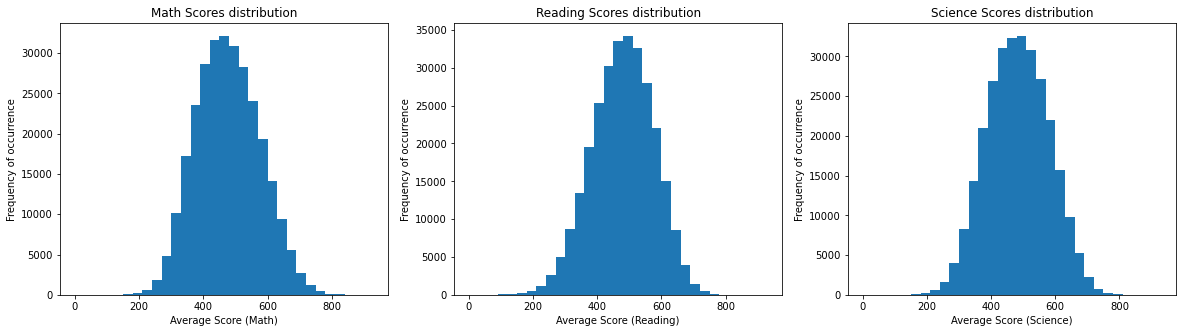

In [45]:
# start with a standard-scaled plot

plt.figure(figsize=[20, 5])
binsize = 30
bins = np.arange(0, pisa['Math_Score_Avg'].max()+binsize, binsize)
plt.subplot(1, 3, 1)
plt.hist(data = pisa, x = 'Math_Score_Avg', bins = bins)
plt.title('Math Scores distribution') 
plt.xlabel('Average Score (Math)')
plt.ylabel('Frequency of occurrence')

plt.subplot(1, 3, 2)
plt.hist(data = pisa, x = 'Reading_Score_Avg', bins = bins)
plt.title('Reading Scores distribution')
plt.xlabel('Average Score (Reading)')
plt.ylabel('Frequency of occurrence')

plt.subplot(1, 3, 3)
plt.hist(data = pisa, x = 'Science_Score_Avg', bins = bins)
plt.title('Science Scores distribution')
plt.xlabel('Average Score (Science)')
plt.ylabel('Frequency of occurrence')
plt.show();


The histograms above show that the scores for each subject follow a normal distribution. The majority of students score between 300 and 650 points on average. At both ends of the distribution, the number of students decreases significantly: students performing exceptionally well score above 650, while low-performing students score below 300.

Next, let's examine the gender of the participating students.

In [46]:
pisa['Gender'].value_counts()

Female    146067
Male      140840
Name: Gender, dtype: int64

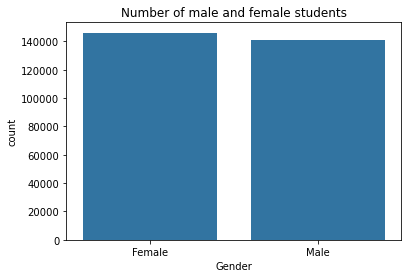

In [47]:
# plotting the number of students' gender.

base_color = sb.color_palette()[0]
sb.countplot(data=pisa, x='Gender', color=base_color)
plt.title('Number of male and female students');

Since there is a large number of participants, the figure shows only a slight difference between the number of female and male students. Numerically, females outnumber males by about 5,000 students, which is a notable difference. We will next examine the number of high-achieving females and males to see if gender influences students performance.

In [49]:
# Dataset of students with scores above 700 in each three subjects (math, reading, science)
math_hi_scr = pisa[pisa.Math_Score_Avg > 700]
reading_hi_scr = pisa[pisa.Reading_Score_Avg > 700]
science_hi_scr = pisa[pisa.Science_Score_Avg >=700]
science_hi_scr.head(3)

,Country,Age,Gender,Study_Extra_Hours,Internet,Computer,Mother_Edu_Level,Father_Edu_Level,Math_Score_Avg,Reading_Score_Avg,Science_Score_Avg
4944,United Arab Emirates,15.67,Male,Never or rarely,Yes,Yes,"Master's, Doctorate, or equivalent","Master's, Doctorate, or equivalent",679.08552,658.85982,715.90824
5191,United Arab Emirates,16.08,Female,Sometimes,Yes,Yes,Bachelor's or equivalent,"Master's, Doctorate, or equivalent",607.50118,634.02224,708.82132
5480,United Arab Emirates,15.67,Male,Often,Yes,Yes,"Master's, Doctorate, or equivalent","Master's, Doctorate, or equivalent",679.78656,688.13080,704.90488


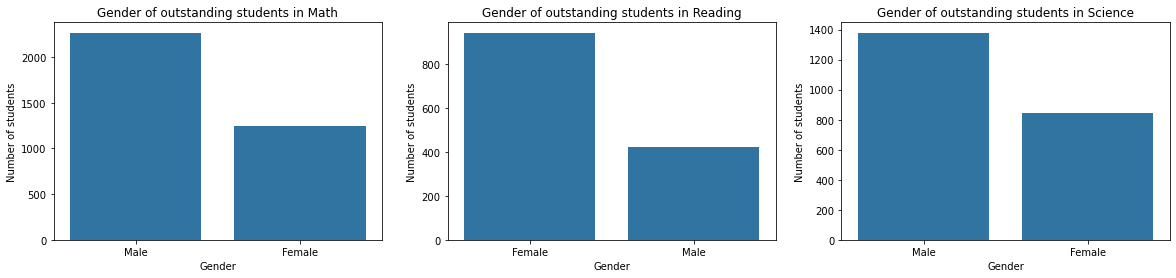

In [51]:
#plotting number students gender with high score in three subjects.

plt.figure(figsize=[20, 4])
orders_m = math_hi_scr['Gender'].value_counts().index
base_color = sb.color_palette()[0]

# Plotting No. of students' gender with Math high scores.
plt.subplot(1, 3, 1)
sb.countplot(data= math_hi_scr, x='Gender', color = base_color, order = orders_m)
plt.title('Gender of outstanding students in Math')
plt.ylabel('Number of students')

# Plotting No. of students' gender with Reading high scores.
plt.subplot(1, 3, 2)
orders_r = reading_hi_scr['Gender'].value_counts().index
sb.countplot(data= reading_hi_scr, x='Gender', color = base_color, order = orders_r)
plt.title('Gender of outstanding students in Reading')
plt.ylabel('Number of students')

# Plotting No. of students' gender with Science high scores.
plt.subplot(1, 3, 3)
orders_s = science_hi_scr['Gender'].value_counts().index

sb.countplot(data= science_hi_scr, x='Gender', color = base_color, order = orders_s)
plt.title('Gender of outstanding students in Science')
plt.ylabel('Number of students');

It can be seen that the number of high-achieving males exceeds that of females in Math and Science. Conversely, the number of high-achieving females exceeds that of male in Reading.

Let's now examine student study habits in math, specifically whether they study for more than two extra hours per day.

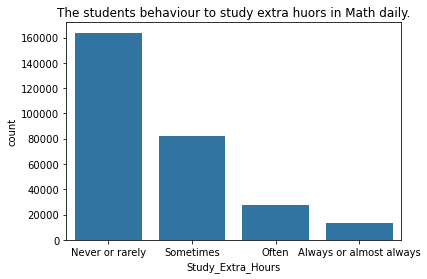

In [82]:
# plotting the number of students study extra hours in Math daily.

base_color = sb.color_palette()[0]
sb.countplot(data=pisa, x='Study_Extra_Hours', color=base_color)
plt.title("The students behaviour to study extra hours in Math daily.");

The figure above illustrates student study behavior in Math. Clearly, the majority of students, over 160,000, report that they never or rarely spend an extra two hours a day studying Math. About 80,000 students sometimes study two extra huors daily, while fewer students spend extra time daily often or always. 

This visualization highlights that most students do not frequently engage in extra study hours for mathematics, while relatively few are consistently dedicated to studying additional hours each day.

Further investigations is needed to determine if a relationship exists between studying for more than extra two hours daily and scoring above 700 points in Math.

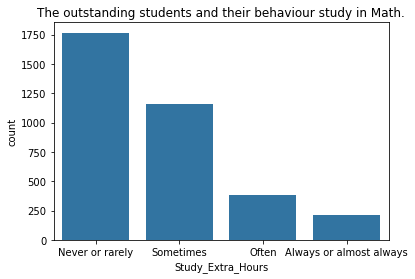

In [137]:
# plotting the number of students study extra hours in Math daily.

base_color = sb.color_palette()[0]
sb.countplot(data=math_hi_scr, x='Study_Extra_Hours', color=base_color)
plt.title("The outstanding students and their behaviour study in Math.");

Contrary to our expectations, most students never, rare, or only sometimes study Math for two extra hours daily. very few students do so regularly. This suggests that the factor of spending extra time studying Math has no significant impact on student performance.

In [59]:
pisa['Mother_Edu_Level'].value_counts()

Post-secondary non-tertiary           78434
Master's, Doctorate, or equivalent    71650
Bachelor's or equivalent              42335
Lower_secondary                       40275
Upper_secondary                       21943
Primary                               21597
Early_childhood                       10673
Name: Mother_Edu_Level, dtype: int64

In [60]:
 pisa['Father_Edu_Level'].value_counts()

Post-secondary non-tertiary           75767
Master's, Doctorate, or equivalent    72920
Lower_secondary                       41967
Bachelor's or equivalent              39462
Upper_secondary                       25193
Primary                               22054
Early_childhood                        9544
Name: Father_Edu_Level, dtype: int64

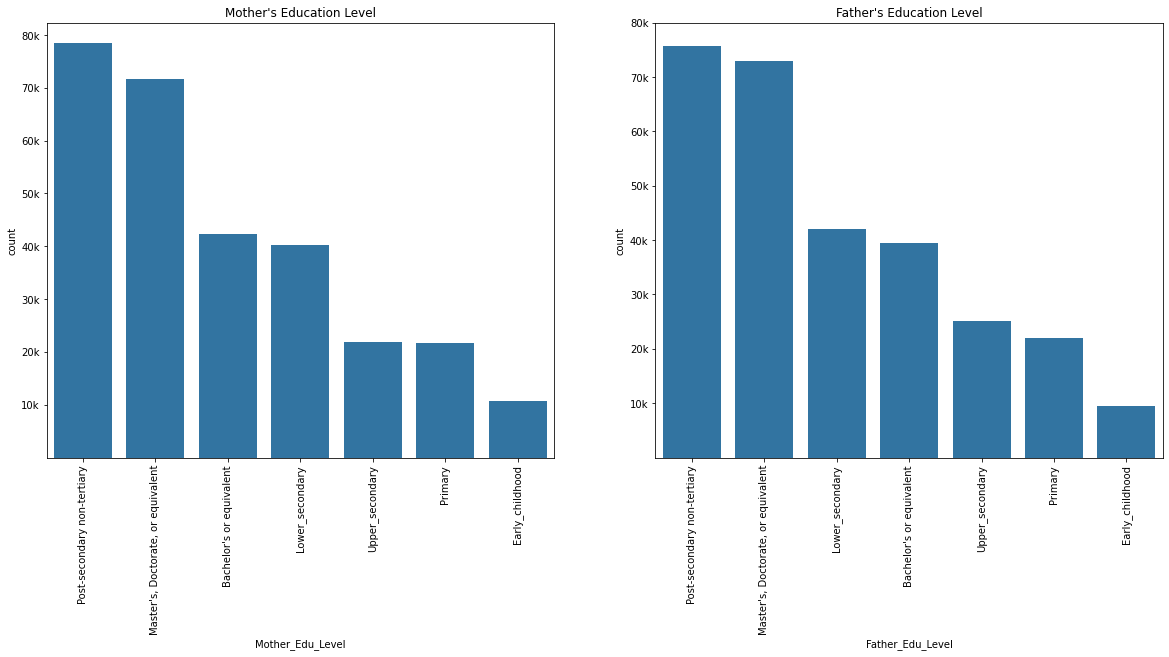

In [61]:
# let's plot all three together to get an idea of each ordinal variable's distribution.

plt.figure(figsize=[20, 8])

# Static-ordering the bars
order1 = pisa['Mother_Edu_Level'].value_counts().index
order2 = pisa['Father_Edu_Level'].value_counts().index

base_color = sb.color_palette()[0]
plt.subplot(1, 2, 1)
sb.countplot(data = pisa, x = 'Mother_Edu_Level', color = base_color, order = order1)
plt.title("Mother's Education Level")
plt.yticks([10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000], 
           ['10k', '20k', '30k', '40k', '50k', '60k', '70k','80k'])
plt.xticks(rotation=90)


plt.subplot(1, 2, 2)
sb.countplot(data = pisa, x = 'Father_Edu_Level', color = base_color, order = order2)
plt.title("Father's Education Level")
plt.yticks([10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000], 
           ['10k', '20k', '30k', '40k', '50k', '60k', '70k','80k'])
plt.xticks(rotation=90)
plt.show()

Both graphs display similar distribution of parental education levels. Most parents hold post-secondary non-university degrees or master's, doctorate, or equivalent qualifications (representing more than 50,000 cases). About half of the parents have a bachelor's or equivalent degree, or a lower secondary education level. Fewer than 30,000 parents belong to the groups with secondary, primary, or early childhood education.

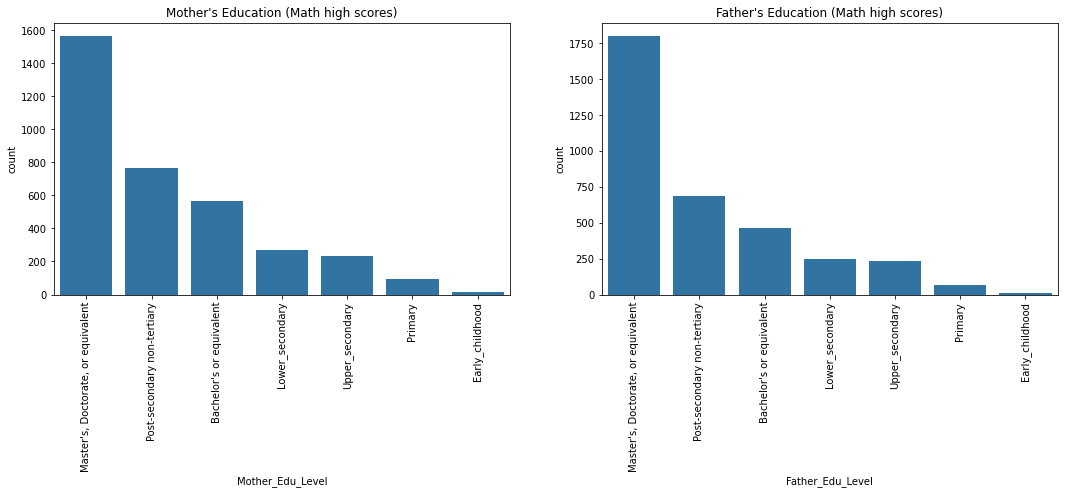

In [70]:
plt.figure(figsize=[18, 5])

# plotting parents education levels from dataset of students with high score in Math subjects.

# Static-ordering the bars
order1 = math_hi_scr['Mother_Edu_Level'].value_counts().index
order2 = math_hi_scr['Father_Edu_Level'].value_counts().index

base_color = sb.color_palette()[0]
plt.subplot(1, 2, 1)
sb.countplot(data = math_hi_scr, x = 'Mother_Edu_Level', color = base_color, order = order1)
plt.title("Mother's Education (Math high scores)")
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sb.countplot(data = math_hi_scr, x = 'Father_Edu_Level', color = base_color, order = order2)
plt.title("Father's Education (Math high scores)")
plt.xticks(rotation=90)
plt.show()

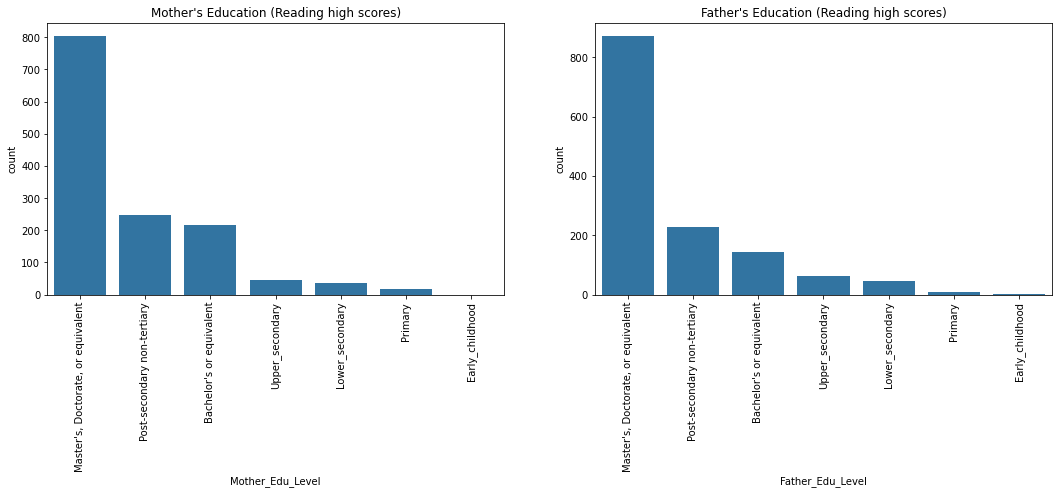

In [81]:
# plotting parents education levels from dataset of students with high score in Reading subjects.

# Static-ordering the bars

plt.figure(figsize=[18, 5])
order1 = reading_hi_scr['Mother_Edu_Level'].value_counts().index
order2 = reading_hi_scr['Father_Edu_Level'].value_counts().index

base_color = sb.color_palette()[0]
plt.subplot(1, 2, 1)
sb.countplot(data = reading_hi_scr, x = 'Mother_Edu_Level', color = base_color, order = order1)
plt.title("Mother's Education (Reading high scores)")
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sb.countplot(data = reading_hi_scr, x = 'Father_Edu_Level', color = base_color, order = order2)
plt.title("Father's Education (Reading high scores)")
plt.xticks(rotation=90)
plt.show();

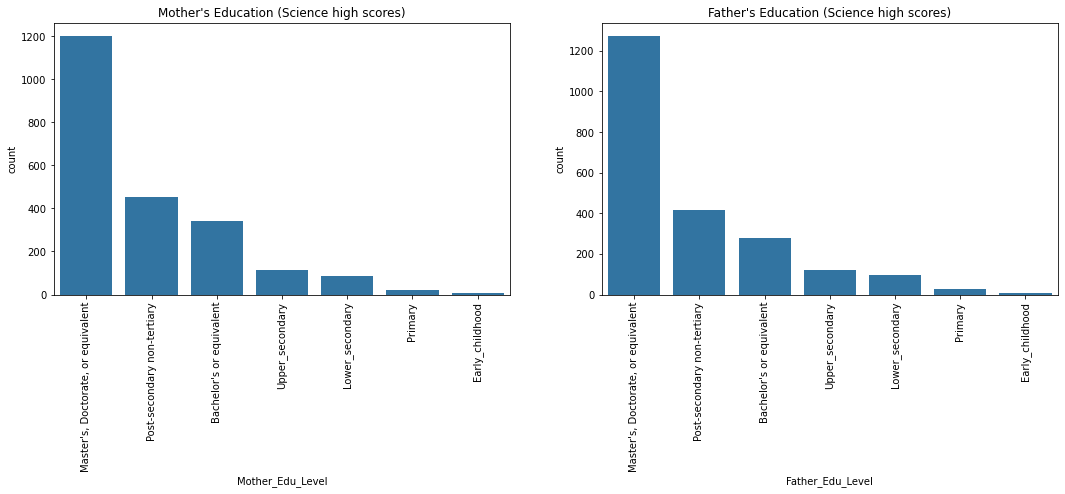

In [72]:
# plotting parents education levels from dataset of students with high score in Science subjects.

# Static-ordering the bars

plt.figure(figsize=[18, 5])
order1 = science_hi_scr['Mother_Edu_Level'].value_counts().index
order2 = science_hi_scr['Father_Edu_Level'].value_counts().index

base_color = sb.color_palette()[0]
plt.subplot(1, 2, 1)
sb.countplot(data = science_hi_scr, x = 'Mother_Edu_Level', color = base_color, order = order1)
plt.title("Mother's Education (Science high scores)")
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sb.countplot(data = science_hi_scr, x = 'Father_Edu_Level', color = base_color, order = order2)
plt.title("Father's Education (Science high scores)")
plt.xticks(rotation=90)
plt.show();

Across the three subjects, the majority of students with high scores (over 700 points) have parents with higher levels of education. In contrast, only a small number of high-scoring students have parents whose education is below the Bachelor's level. This suggests that parental education level is a significant factor influencing student academic achievement.

Next, let's explore how access to a computer and the Internet correlates with high academic performance.

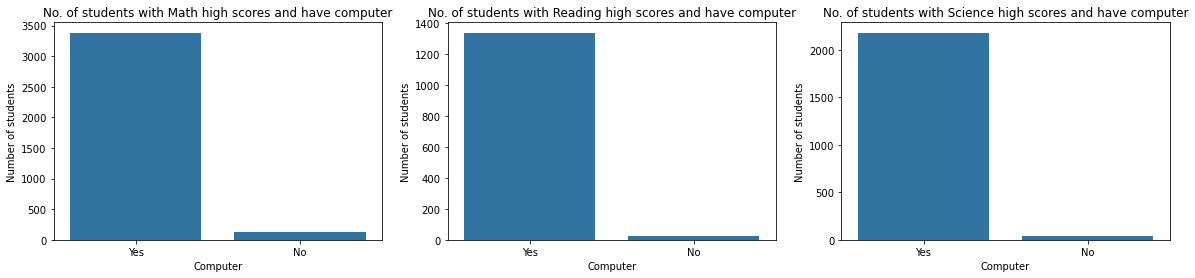

In [508]:
#plotting number of students with high score in three subjects and have computer.

plt.figure(figsize=[20, 4])
orders = math_hi_scr['Computer'].value_counts().index
base_color = sb.color_palette()[0]

# Plotting No. of students with Math high scores and have computer.
plt.subplot(1, 3, 1)
sb.countplot(data= math_hi_scr, x='Computer', color = base_color, order = orders)
plt.title('No. of students with Math high scores and have computer')
plt.ylabel('Number of students')

# Plotting No. of students with Reading high scores and have computer.
plt.subplot(1, 3, 2)
sb.countplot(data= reading_hi_scr, x='Computer', color = base_color, order = orders)
plt.title('No. of students with Reading high scores and have computer')
plt.ylabel('Number of students')

# Plotting No. of students with Science high scores and have computer.
plt.subplot(1, 3, 3)
sb.countplot(data= science_hi_scr, x='Computer', color = base_color, order = orders)
plt.title('No. of students with Science high scores and have computer')
plt.ylabel('Number of students');

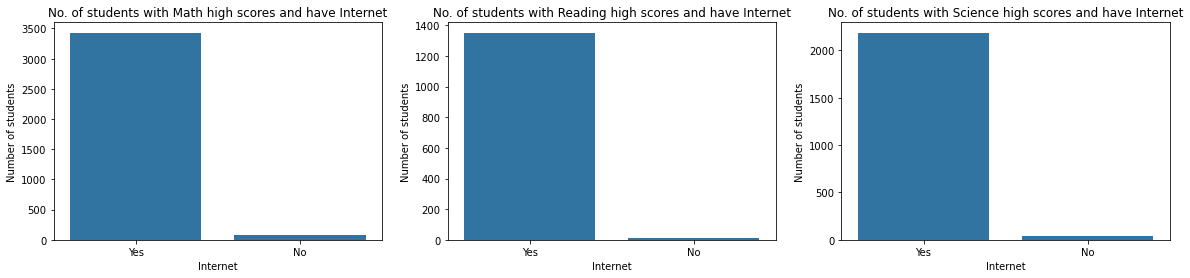

In [507]:
#plotting number students with high score in three subjects and have Internet.

plt.figure(figsize=[20, 4])
orders = math_hi_scr['Internet'].value_counts().index
base_color = sb.color_palette()[0]

# Plotting No. of students with Math high scores and have Interne.
plt.subplot(1, 3, 1)
sb.countplot(data= math_hi_scr, x='Internet', color = base_color, order = orders)
plt.title('No. of students with Math high scores and have Internet')
plt.ylabel('Number of students')

# Plotting No. of students with Reading high scores and have Internet.
plt.subplot(1, 3, 2)
sb.countplot(data= reading_hi_scr, x='Internet', color = base_color, order = orders)
plt.title('No. of students with Reading high scores and have Internet')
plt.ylabel('Number of students')

# Plotting No. of students with Science high scores and have Internet.
plt.subplot(1, 3, 3)
sb.countplot(data= science_hi_scr, x='Internet', color = base_color, order = orders)
plt.title('No. of students with Science high scores and have Internet')
plt.ylabel('Number of students');

In [513]:
print(pisa['Internet'].value_counts())
print(' ')
print(pisa['Computer'].value_counts())

Yes    245065
No      41842
Name: Internet, dtype: int64
 
Yes    250387
No      36520
Name: Computer, dtype: int64


<br>
Both charts indicate that most top-performing students have access to a computer and the Internet. Statistically, most students, in general, own these resources. Therefore, computer and Internet access do not appear to have a substantial impact on students’ overall academic progress.
<br>

In the following section, we will examine additional aspects, such as country of origin, among students who scored above 700 points.

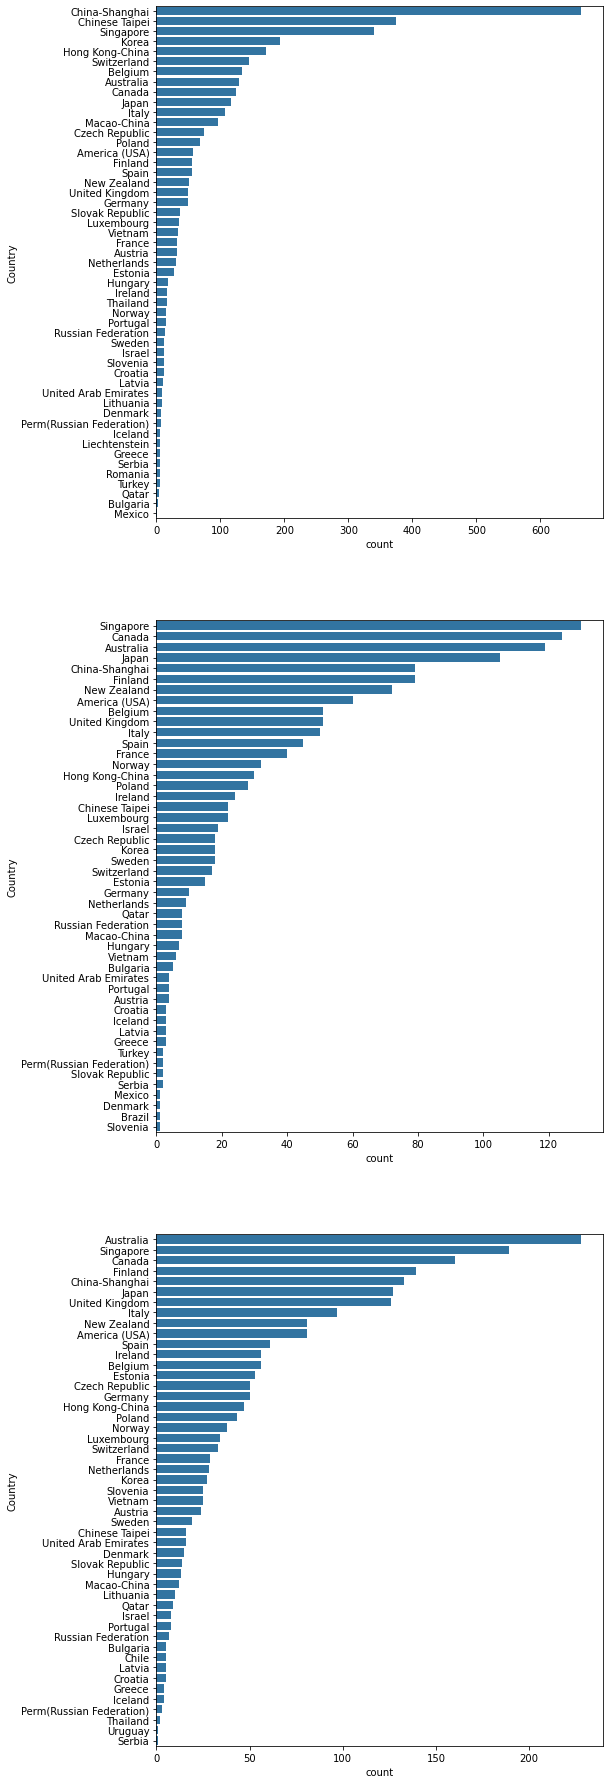

In [509]:
#plotting number students with high score in three subjects in each country.

fig, ax = plt.subplots(nrows=3, figsize = [8,32])

default_color = sb.color_palette()[0]

#plotting number students with high score in Math in each country.
m_orders = math_hi_scr['Country'].value_counts().index
sb.countplot(data = math_hi_scr, y = 'Country', color = default_color, order = m_orders, ax = ax[0])

#plotting number students with high score in Reading in each country.
r_orders = reading_hi_scr['Country'].value_counts().index
sb.countplot(data = reading_hi_scr, y = 'Country', color = default_color, order = r_orders, ax = ax[1])

#plotting number students with high score in Science in each country.
s_orders = science_hi_scr['Country'].value_counts().index
sb.countplot(data = science_hi_scr, y = 'Country', color = default_color, order = s_orders, ax = ax[2])

plt.show();

The previous chart reveals the following patterns:
- **In mathematics**, the three countries with the highest number of top-performing students are China-Shanghai, Chinese Taipei, and Singapore, respectively.
- **In reading**, Singapore, Canada, and Australia have the greatest number of students with high scores.
- **In science**, the top countries are Australia, Singapore, and Canada.

Singapore consistently ranks among the top three countries for the number of outstanding students in each subject. This strong performance may be attributed to Singapore's high-quality education system, which emphasizes teacher training, deep curriculum mastery, and significant government investment. Canada, Australia, and China-Shanghai also have a notable number of exceptional students across all three subjects. Additionally, Japan, Korea, Finland, the United Kingdom, and the United States each have a substantial number of outstanding students in specific subjects.

### Discussion of Variable Distributions

The distributions of the average scores for mathematics, reading, and science are all approximately normal distribution, without noticeable skewness or overlap. tTherefore, no data transformations were required for these variables. There were also no unusual outliers evident in the score distributions.

### Bivariate Exploration

To deepen this analysis, it is important to examine the correlations between variables in the dataset. This step helps to determine whether there are meaningful relationships between variables of interest, such as between student background factors and academic performance.

In [83]:
numeric_vars = ['Age','Math_Score_Avg', 'Reading_Score_Avg', 'Science_Score_Avg']
categoric_vars = ['Country','Gender','Study_Extra_Hours','Internet', 'Computer', 'Mother_Edu_Level', 'Father_Edu_Level']

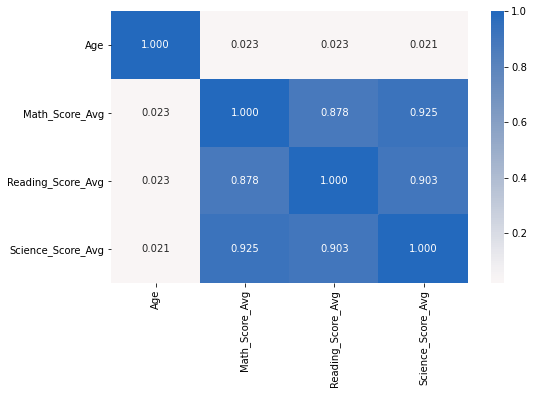

In [86]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(pisa[numeric_vars].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0)
plt.show();

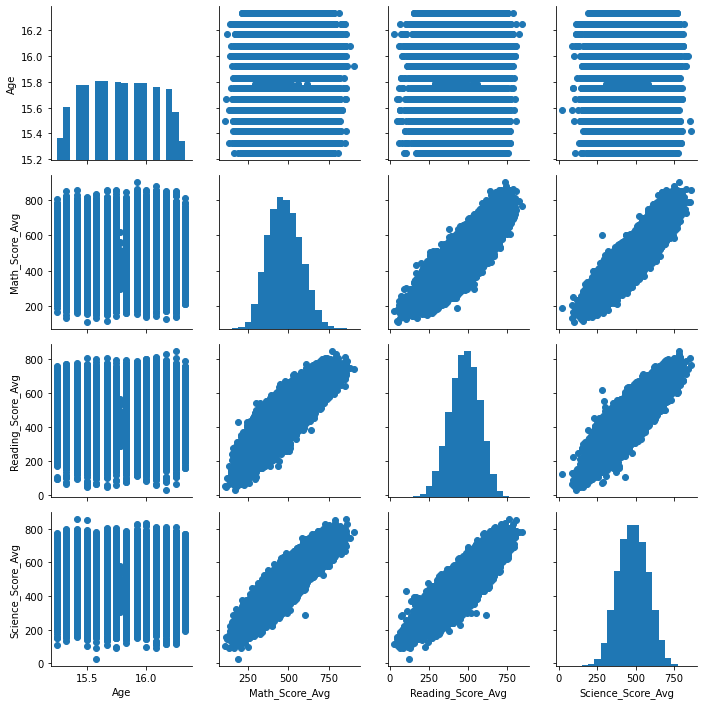

In [94]:
# plot matrix
g = sb.PairGrid(data = pisa, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20)
g.map_offdiag(plt.scatter);

Note: I tried sampling data for clearer and faster plotting, but the results were almost the same as with the original dataset.
It is reasonable to observe a strong relationship between the three variables ('Math_Score_Avg', 'Reading_Score_Avg', 'Science_Score_Avg') because students' scores are often similar across subjects. The age feature is not impactful in this dataset because the students are, on average, the same age.

The univariate explorations showed that the parents' education level is an effective feature; therefore, we will examine this variable in relation to the three subjects. (we have one categorical and one numeric variable).

In [183]:
def plot_relation(xvar,titles):
    
    plt.figure(figsize=[20, 5])
    base_color = sb.color_palette()[0]
    variables = ['Math_Score_Avg', 'Reading_Score_Avg', 'Science_Score_Avg']
    
    for i in range(len(variables)):
        var = variables[i]
        plt.subplot(1, 3, i+1)
        sb.boxplot(data = pisa, x = xvar, y = var, color = base_color)
        plt.title(titles[i])
        plt.xticks(rotation=90)

    plt.show();

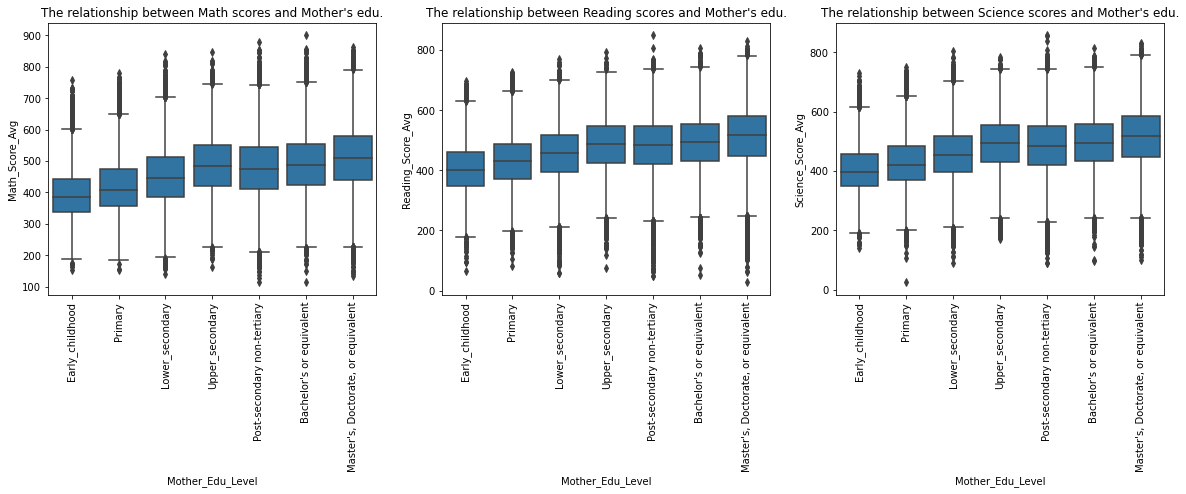

In [184]:
#Plotting the relationship between the average scores in three subjects and Mother's education.

relation_title = ["The relationship between Math scores and Mother's edu.",
          "The relationship between Reading scores and Mother's edu.",
          "The relationship between Science scores and Mother's edu."]

x_var = 'Mother_Edu_Level'
plot_relation(x_var,relation_title)

The boxplot provides detailed insights into the distribution of scores based on mothers' education levels. Overall, the median scores tend to increase as parents' education levels rise. The lowest average scores appear among students whose mothers have an Early Childhood education level, while the highest scores are seen among those whose mothers hold a Master’s, Doctorate, or equivalent degree. However, the lowest outlier in reading scores corresponds to a student whose mother has a Master’s, Doctorate, or equivalent level. The three intermediate education levels—Upper Secondary, Post-Secondary Non-Tertiary, and Bachelor’s or equivalent—show similar distributions. Overall, The average of scores for all subjects is between 350 and 580 points when outliers are excluded.

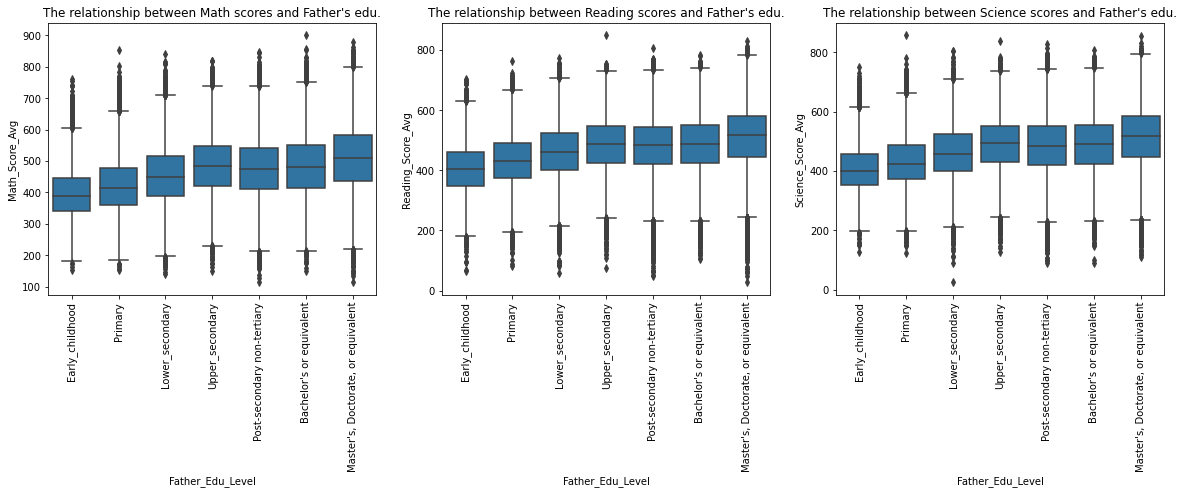

In [185]:
#Plotting the relationship between the average scores in three subjects and Father's education.

relation_title = ["The relationship between Math scores and Father's edu.",
          "The relationship between Reading scores and Father's edu.",
          "The relationship between Science scores and Father's edu."]

x_var = 'Father_Edu_Level'
plot_relation(x_var,relation_title)

The distribution of scores according to Fathers' education levels is approximately the same as that related to Mothers' education levels.

Further investigation is needed to explore the relationship between studying an extra two hours daily in Math and students' performance.

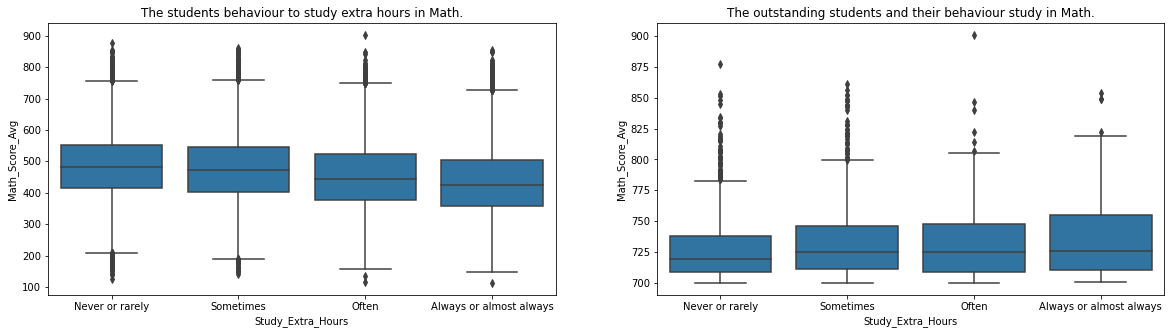

In [138]:
# Plotting the distribution Math scores vs. students whose study extra two hours in Math daily.
plt.figure(figsize=[20, 5])

base_color = sb.color_palette()[0]
plt.subplot(1, 2, 1)
sb.boxplot(data = pisa, x = 'Study_Extra_Hours', y = 'Math_Score_Avg', color = base_color)
plt.title("The students behaviour to study extra hours in Math.")

# Plotting the distribution high Math scores vs. students whose study extra two hours in Math daily.
plt.subplot(1, 2, 2)
sb.boxplot(data = math_hi_scr, x = 'Study_Extra_Hours', y = 'Math_Score_Avg', color = base_color)
plt.title("The outstanding students and their behaviour study in Math.")
plt.show();

The first boxplot clearly shows that most students who "never or rarely" or "sometimes" study an extra two hours in Math daily tend to achieve better scores. However, in the univariate bar plot, outliers misled our interpretation. The second boxplot reveals that for high achievers (scores over 700), performance increases with the frequency of studying an extra two hours daily. This finding supports our insight about the positive impact of this feature.

Note: Due to time constraints, further investigation to remove outliers will be neglected.

Regarding relationships observed, when exploring the connection between 'Study_Extra_Hours' and 'Math_Score_Avg' for high achievers, we found results consistent with our hypothesis: studying an extra two hours per day in Math boosts student performance.

### Multivariate Exploration

In this section, we will investigate investigate the relationship between the top 10 countries with the most outstanding students across the three subjects and the gender of those students.

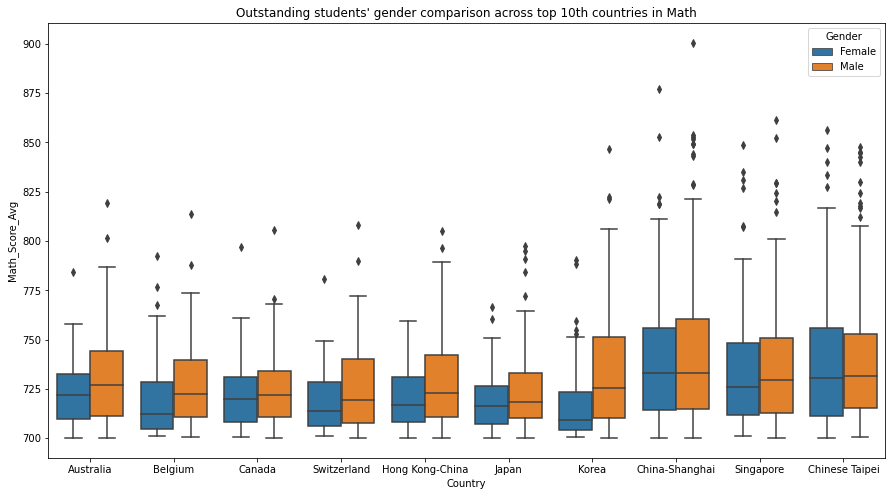

In [170]:
# Plotting outstanding students' gender across top 10th countries in Math.
count_lst = list(math_hi_scr.Country.value_counts().index)
math_country = math_hi_scr[math_hi_scr['Country'].isin(count_lst[:10])]

plt.figure(figsize=[15,8])
sb.boxplot(data= math_country, x='Country', y= 'Math_Score_Avg', hue = 'Gender')
plt.title("Outstanding students' gender comparison across top 10th countries in Math");

The figure shows a noticeable gender difference among oustanding students, with the number of males exceeding females except in Chinese Taipei. The gender of studens in Singapore is approximatly equal. In Korea, the number of males is almost twice that of females. The three countries China-Shanghai, Chinese Taipei, and Singapore have the largest number of high-scoring students in Math, respectively.

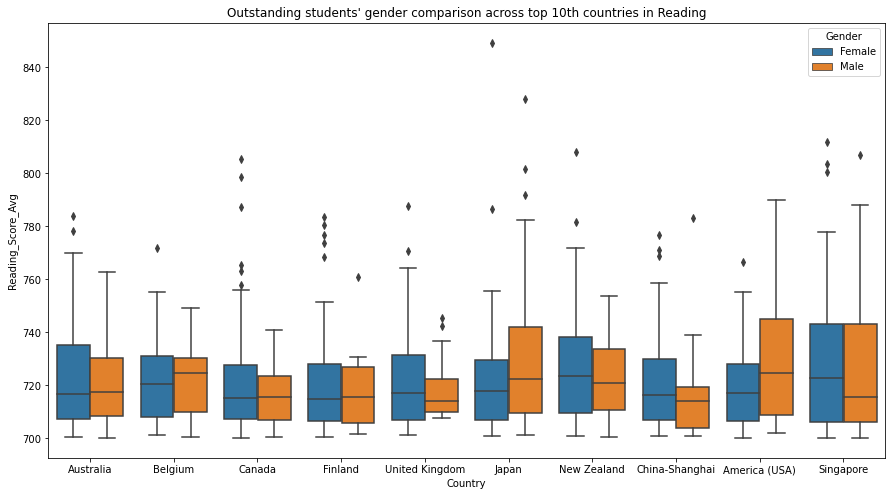

In [168]:
# Plotting outstanding students' gender across top 10th countries in Reading.

count_lst2 = list(reading_hi_scr.Country.value_counts().index)
reading_country = reading_hi_scr[reading_hi_scr['Country'].isin(count_lst2[:10])]

plt.figure(figsize=[15,8])
sb.boxplot(data= reading_country, x='Country', y= 'Reading_Score_Avg', hue = 'Gender')
plt.title("Outstanding students' gender comparison across top 10th countries in Reading");

Similarly, the figure reveals a gender difference among outstanding students in Reading, where the number of females exceeds males except in Japan and the United States (USA). Gender distribution is equal in Singapore. In the United Kingdom, the number of females is almost twice that of males. Singapore and Australia have the largest number of high-scoring students in Reading, respectively.

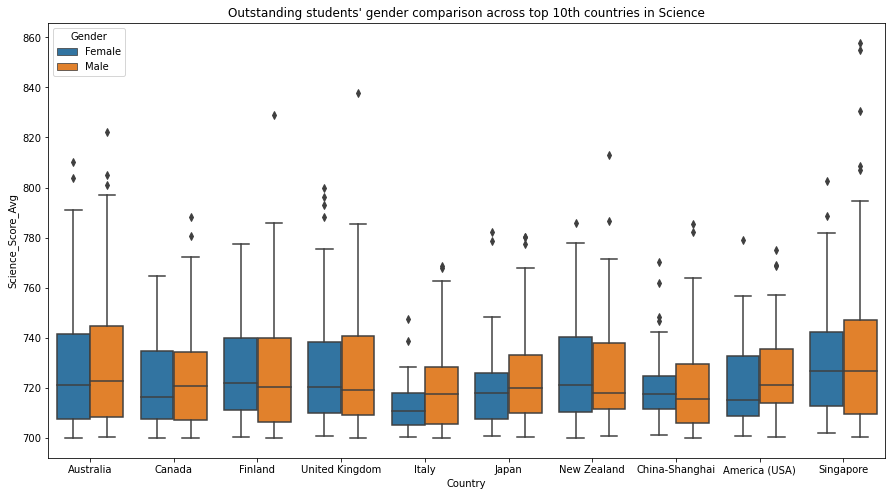

In [171]:
# Plotting outstanding students' gender across top 10th countries in Science.

count_lst3 = list(science_hi_scr.Country.value_counts().index)
science_country = science_hi_scr[science_hi_scr['Country'].isin(count_lst3[:10])]

plt.figure(figsize=[15,8])
sb.boxplot(data= science_country, x='Country', y= 'Science_Score_Avg', hue = 'Gender')
plt.title("Outstanding students' gender comparison across top 10th countries in Science");

The figure shows a noticeable gender difference among excellent students, with the number of males exceeding females except in New Zealand. The gender distribution in Canada is approximately equal. In China-Shanghai and Italy, the number of males is almost twice that of females. The three countries Australia, Singapore, and Canada have the largest number of high-scoring students in Science, respectively.

## Conclusions
In conclusion,  this project followed systemic steps to explore the data and derive insights.
The key findings from the dataset structure are as follows:<br/>

**1. Are there differences in achievement based on gender, location, or the level of parent's education?**<br/>
Our exploration revealed that the number of female participants was slightly higher than the number of male participants. However, males outperformed females in Math and Science, while the talented females outnumbered males in Reading.

Furthermore, Singapore ranked among the top three countries with the most outstanding students in every subject, which may be attributed to its robust education system. Countries like Canada, Australia, and China-Shanghai also had a significant number of hight-achieving students across all three subjects. Other nations, including Japan, Korea, Finland, the Uk, and the USA have had a notable number of top-performing students in specific subjects.

Our analysis also found that the lowest average student scores were associated with parents who had only early childhood education level, while the best scores were linked to parents with a Master's, Doctorate, or equivalent. The three intermediate levels (Upper_secondary, Post-secondary non-tertiary, Bachelor's or equivalent) showed similar score distributions. 

**2. Do the educational aids such as computers and the Internet make a difference in student achievement?**<br/>
The results showed that most students own a computer and have internet access. This suggests that simply having access to these tools does not have a significant impact on student progress, likely due to their widespread availability.

**3. Does the duration of study (e.g., spending more than two extra hours in Math) affect the student's performance?**<br/>
Our analysis found that the performance of high achievers (those with scores over 700) improves as the frequency of studying more than two extra hours per day increases.